In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.cluster import KMeans

SEED=90089


In [2]:
# Read Data
patient_df = pd.read_csv('../data/hyperglycemic_patients.csv')

#Print shape and data preview
print("Dataframe shape:   ", patient_df.shape)
print("Dataframe Features:", patient_df.columns)
patient_df.head()

Dataframe shape:    (12872, 17)
Dataframe Features: Index(['subject_id', 'stay_id', 'glucose_max', 'anchor_age', 'dod', 'gender',
       'dbp_mean', 'sbp_mean', 'glucose_mean', 'heart_rate_mean', 'spo2_mean',
       'resp_rate_mean', 'temperature_mean', 'apsiii', 'glucose_score', 'los',
       'avg_bmi_value'],
      dtype='object')


,subject_id,stay_id,glucose_max,anchor_age,dod,gender,dbp_mean,sbp_mean,glucose_mean,heart_rate_mean,spo2_mean,resp_rate_mean,temperature_mean,apsiii,glucose_score,los,avg_bmi_value
0,12041046,31249096,277.0,36,0,0,64.320000,112.880000,221.272727,101.800000,92.000000,17.346154,37.186250,38,3,1.938414,26.750000
1,17421995,38100564,2340.0,35,0,0,77.769231,122.961538,468.592593,105.361111,96.093023,19.813953,36.727586,87,5,4.472905,30.558477
2,10352416,35043893,531.0,23,1,0,64.169118,119.661765,275.352941,154.028986,83.698413,25.584615,39.725000,158,5,11.636042,30.558477
3,16924291,34261137,259.0,19,1,1,49.300000,74.200000,259.000000,89.750000,70.000000,26.333333,31.900000,88,3,0.309664,30.558477
4,13553087,36461140,398.0,31,0,0,78.600000,133.800000,285.000000,100.826087,90.304348,25.173913,36.593333,34,5,2.794167,30.558477


### Using Elbow methods to determine optimal clusters
Given `los` data was very right-skewed from the `exploratory_data_analysis.ipynb` from `visualizations`. We perform log-transform on `los` so data can be centrally-distributed whilst providing informative range for k-mean clusters.

In [3]:
# log-transform length-of-stay
patient_df['log10_los'] = np.log10(patient_df.los)

In [80]:
los_values = patient_df[['log10_los']]
inertia_lst = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=SEED)
    kmeans.fit(los_values)
    inertia_lst.append(kmeans.inertia_)

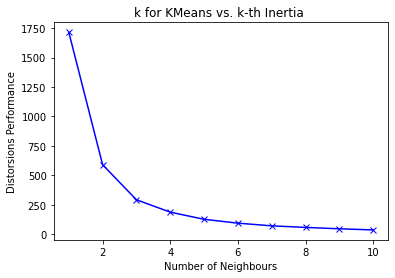

In [81]:
plt.plot(list(range(1, 11)), inertia_lst, 'bx-')
plt.title("k for KMeans vs. k-th Inertia ")
plt.xlabel("Number of Neighbours")
plt.ylabel("Distorsions Performance")
plt.show()

In [4]:
# we use 3 labels to encode cateogories
kmeans = KMeans(n_clusters=3, random_state=SEED)
patient_df['label'] = kmeans.fit_predict(patient_df[['log10_los']])
print(10 ** (kmeans.cluster_centers_)) # inverse-transform log10 data

[[0.83807866]
 [6.47457705]
 [2.24203513]]


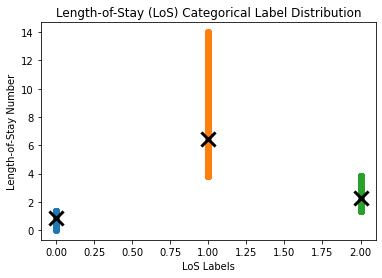

In [5]:
fig, ax = plt.subplots()
for label in range(3):
    y = patient_df[patient_df['label'] == label]['los']
    ax.scatter(np.repeat(label, len(y)), y, alpha=0.4, label=label)
    center_y = y.mean()
    ax.scatter(label, (10**kmeans.cluster_centers_[label]),
                marker="x",
                s=200,
                linewidths=3,
                color="black")
plt.title("Length-of-Stay (LoS) Categorical Label Distribution")
plt.xlabel("LoS Labels")
plt.ylabel("Length-of-Stay Number")
plt.show() #note that label is arbitrary and the middle label expresses outliers in the datasets

In [6]:
patient_df[patient_df['label']==0]['los'].describe()

count    3839.000000
mean        0.892758
std         0.276454
min         0.016979
25%         0.708102
50%         0.913113
75%         1.100457
max         1.370706
Name: los, dtype: float64

In [7]:
patient_df[patient_df['label']==1]['los'].describe()

count    3401.000000
mean        6.927564
std         2.710212
min         3.810451
25%         4.762083
50%         6.071597
75%         8.640058
max        13.998345
Name: los, dtype: float64

In [8]:
patient_df[patient_df['label']==2]['los'].describe()

count    5632.000000
mean        2.323496
std         0.659418
min         1.370914
25%         1.778981
50%         2.153785
75%         2.861626
max         3.809942
Name: los, dtype: float64

In [9]:
# labelled_patient_df = patient_df.drop(labels='los', axis=1)
labelled_patient_df = patient_df.copy()
print("label spaces: ", np.unique(patient_df[['label']]))
labelled_patient_df.head()

label spaces:  [0 1 2]


,subject_id,stay_id,glucose_max,anchor_age,dod,gender,dbp_mean,sbp_mean,glucose_mean,heart_rate_mean,spo2_mean,resp_rate_mean,temperature_mean,apsiii,glucose_score,los,avg_bmi_value,log10_los,label
0,12041046,31249096,277.0,36,0,0,64.320000,112.880000,221.272727,101.800000,92.000000,17.346154,37.186250,38,3,1.938414,26.750000,0.287447,2
1,17421995,38100564,2340.0,35,0,0,77.769231,122.961538,468.592593,105.361111,96.093023,19.813953,36.727586,87,5,4.472905,30.558477,0.650590,1
2,10352416,35043893,531.0,23,1,0,64.169118,119.661765,275.352941,154.028986,83.698413,25.584615,39.725000,158,5,11.636042,30.558477,1.065805,1
3,16924291,34261137,259.0,19,1,1,49.300000,74.200000,259.000000,89.750000,70.000000,26.333333,31.900000,88,3,0.309664,30.558477,-0.509109,0
4,13553087,36461140,398.0,31,0,0,78.600000,133.800000,285.000000,100.826087,90.304348,25.173913,36.593333,34,5,2.794167,30.558477,0.446252,2


In [10]:
labelled_patient_df['label'].value_counts() 

2    5632
0    3839
1    3401
Name: label, dtype: int64

In [11]:
# Export label data to csv
labelled_patient_df.to_csv('../data/hyperglycemic_patients_w_kmean_categories.csv')

In [78]:
# # Data split
# X = label_df.loc[:, label_df.columns != 'label']
# y = label_df.loc[:, label_df.columns == 'label']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=89)
# X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=89)